# Cas pratique analyse des sentiments

### On reprend l'import des données et la création de la matrice de distances du cas pratique sur la classification des textos : 

- Importez la base de données dans un dataframe 

In [25]:
import pandas as pd
df_sms = pd.read_table("smsspamcollection/SMSSpamCollection.txt", header = None)
df_sms.columns = ["statut", "texte"]

In [26]:
df_sms.head()

,statut,texte
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
import re
import string

# On crée une fonction qu'on appliquera à l'ensemble des lignes
def nettoyage(text):
    text = text.lower() # passage en minuscules
    text = re.sub("\d", "", text) # On enlève les chiffres
    # on n'enlève pas la ponctuation, qui est traitée par CountVectorizer()  
    return text
df_sms_clean = pd.DataFrame(df_sms.texte.apply(lambda x: nettoyage(x)))

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = "english")

# On fit_transform 
mdt = cv.fit_transform(df_sms_clean.texte)
mdt_textos_all = pd.DataFrame(mdt.toarray(), columns = cv.get_feature_names())
mdt_textos_all.index = df_sms.statut
mdt_textos_all

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,èn,〨ud
statut,,,,,,,,,,,,,,,,,,,,,
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Beaucoup de colonnes, voyons ce qu'on peut nettoyer...

# On somme les termes par spam ou ham
sum_mots = mdt_textos_all.groupby("statut").sum()
sum_mots_t = sum_mots.transpose()
sum_mots_t

statut,ham,spam
____,2,0
aa,1,0
aah,3,0
aaniye,1,0
aaooooright,1,0
...,...,...
zouk,0,1
zs,0,1
zyada,1,0
èn,1,0


In [30]:
# On peut supprimer quand le nombre d'occurences représente moins de 1% des observations
nb_occurences = pd.DataFrame()
for i in ["ham", "spam"]:
    nb_occurences[i] = sum_mots_t[i]/len(mdt_textos_all[mdt_textos_all.index == i]) 

part_occu_max = nb_occurences.max(axis = 1)
        

In [31]:
additional_sw = part_occu_max[part_occu_max<=0.01].index.values
list_sw = []
for i in additional_sw:
    list_sw.append(i)

# On fait une liste avec les stop words usuels et ceux qu'on a choisis
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# ajout de nos nouveaux stop words
stop_words = text.ENGLISH_STOP_WORDS.union(additional_sw)
stop_words

frozenset({'released',
           'inever',
           'showr',
           'thoughts',
           'roast',
           'sympathetic',
           'fudge',
           'former',
           'badass',
           'rose',
           'sort',
           'whos',
           'rvx',
           'flew',
           'quiteamuzing',
           'election',
           'greet',
           'opponenter',
           'bat',
           'knows',
           'org',
           'shb',
           'online',
           'still',
           'ceiling',
           'luvs',
           'wee',
           'previews',
           'mens',
           'find',
           'melody',
           'suddenly',
           'accounts',
           'abbey',
           'peak',
           'postal',
           'mundhe',
           'snot',
           'wants',
           'backwards',
           'not',
           'bird',
           'realizes',
           'vijaykanth',
           'chk',
           'battle',
           'penny',
           'thousad',
    

In [32]:
cv = CountVectorizer(stop_words = stop_words)
# On refait la matrice de distances ainsi : 
mdt = cv.fit_transform(df_sms_clean.texte)
mdt_textos = pd.DataFrame(mdt.toarray(), columns = cv.get_feature_names())
mdt_textos.index = df_sms.statut
mdt_textos

,ac,account,admirer,age,amp,answer,anytime,apply,area,ask,...,word,work,worth,www,xmas,xxx,ya,yeah,yes,yr
statut,,,,,,,,,,,,,,,,,,,,,
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spam,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Début cas pratique : 
- En repartant de la table `df_sms_clean`, calculez les niveaux de subjectivité et de positivité des textos analysés et stockez ces informations dans deux nouvelles variables de la table.  
- Représentez graphiquement la répartition des textos en fonction de leur subjectivité et de leur subjectivité. Faites apparaître dans une couleur différente les spams. Pourrait-on utiliser ces critères pour les repérer?   
- Faites apparaître les textos les plus positifs/les textos les plus négatifs/les textos les plus subjectifs/les plus objectifs pour vérifier que la mesure fonctionne correctement.   

_Bonus_ : On s'intéresse maintenant aux spam :  
- En reprenant notre modèle de prédiction de spams, déterminez si la probabilité qu'on repère un spam comme tel dépend ou non du degré de subjectivité et de positivité de son contenu.  
(Démarche à suivre : reprendre le vecteur de probabilités d'être un spam pour les spams de y_test et représenter ces points en fonction de la positivité et de la subjectivité en colorant selon ce vecteur).  

In [33]:
# on adapte le code à nos données textos : 
from textblob import TextBlob

pos = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_sms_clean['positivite'] = df_sms_clean.texte.apply(pos)
df_sms_clean['subjectivite'] = df_sms_clean.texte.apply(sub)
df_sms_clean[["positivite", "subjectivite"]]

,positivite,subjectivite
0,0.150000,0.762500
1,0.500000,0.500000
2,0.400000,0.733333
3,0.100000,0.300000
4,0.000000,0.000000
...,...,...
5567,0.270833,0.916667
5568,0.000000,0.000000
5569,-0.112500,0.287500
5570,0.216667,0.433333


On représente graphiquement les points correspondant aux textos en fonction de leur positivité/de leur subjectivité : 

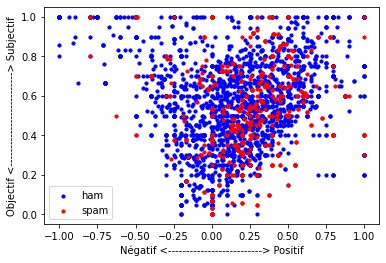

In [34]:
import numpy as np
import matplotlib.pyplot as plt
cdict = {"spam": 'red', "ham": 'blue'}
fig, ax = plt.subplots()
for g in np.unique(df_sms.statut):
    ix = np.where(df_sms.statut == g)
    ax.scatter(df_sms_clean.positivite.iloc[ix], df_sms_clean.subjectivite.iloc[ix], c = cdict[g], label = g, s = 10)
    ax.set_xlabel("Négatif <--------------------------> Positif")
    ax.set_ylabel("Objectif <--------------------------> Subjectif")
ax.legend()
plt.show()

Les spams ne semblent pas être caractérisés particulièrement par leur degré de positivité/de subjectivité. On va examiner quelques textos pour voir si l'évaluation est bonne : 

In [35]:
# on affiche les textos non spams plutôt positifs : 
df_sms_clean.loc[(df_sms_clean.positivite >= 0.75) & (df_sms.statut == "ham"), :].texte.values

array(['great! i hope you like your man well endowed. i am  &lt;#&gt;  inches...',
       "hi frnd, which is best way to avoid missunderstding wit our beloved one's?",
       'great escape. i fancy the bridge but needs her lager. see you tomo ',
       'lol no. u can trust me.',
       'your account has been refilled successfully by inr  &lt;decimal&gt; . your keralacircle prepaid account balance is rs  &lt;decimal&gt; . your transaction id is kr &lt;#&gt; .',
       'sounds great! are you home now?',
       "awesome, i'll see you in a bit",
       "lol yes. our friendship is hanging on a thread cause u won't buy stuff.",
       'today is accept day..u accept me as? brother sister lover dear best clos lvblefrnd jstfrnd cutefrnd lifpartnr belovd swtheart bstfrnd no rply means enemy',
       'you made my day. do have a great day too.',
       'k.k:)advance happy pongal.',
       "that would be great. we'll be at the guild. could meet on bristol road or somewhere - will get in touch over 

Il semblerait que "lol" soit considéré comme positif, vérifions cela : 

In [36]:
TextBlob("lol").sentiment.polarity

0.8

In [37]:
# on affiche les textos non spams plutôt négatifs : 
df_sms_clean.loc[(df_sms_clean.positivite <= -0.75) & (df_sms.statut == "ham"), :].texte.values

array(['haf u found him? i feel so stupid da v cam was working.',
       'you were supposed to wake me up &gt;:(',
       "we're all getting worried over here, derek and taylor have already assumed the worst",
       'hey no i ad a crap nite was borin without ya  boggy with me u boring biatch! thanx but u wait til nxt time il ave ya ',
       "hasn't that been the pattern recently crap weekends?",
       'babe ? i lost you ... :-(', "annoying isn't it.",
       'horrible gal. me in sch doing some stuff. how come u got mc?',
       'im in inperialmusic listeningthe weirdest track ever by\x94leafcutter john\x94-sounds like insects being molested&someone plumbing,remixed by evil men on acid!',
       "yeah jay's sort of a fucking retard",
       'horrible bf... i now v hungry...',
       'u guys never invite me anywhere :(',
       'yes but i dont care! i need you bad, princess!',
       'the monthly amount is not that terrible and you will not pay anything till months after finishing sch

Il semble que la fonction reconnaisse même les émoticones!

In [38]:
print(TextBlob(":(").sentiment.polarity, TextBlob(":)").sentiment.polarity, 
      TextBlob(";)").sentiment.polarity, TextBlob(":/").sentiment.polarity)

-0.75 0.5 0.25 -0.25


In [39]:
# on affiche les textos spams plutôt positifs : 
df_sms_clean.loc[(df_sms_clean.positivite >= 0.75) & (df_sms.statut == "spam"), :].texte.values

array(['six chances to win cash! from  to , pounds txt> csh and send to . cost p/day, days, + tsandcs apply reply hl  info',
       'you are guaranteed the latest nokia phone, a gb ipod mp player or a £ prize! txt word: collect to no: ! ibhltd ldnwh p/mtmsgrcvd+',
       "for ur chance to win a £ wkly shopping spree txt: shop to . t's&c's www.txt--shop.com custcare , xp/wk",
       'u are subscribed to the best mobile content service in the uk for £ per  days until you send stop to . helpline ',
       'ur awarded a city break and could win a £ summer shopping spree every wk. txt store to  . skilgme. tscswinawk!age £.perwksub',
       'all the lastest from stereophonics, marley, dizzee racal, libertines and the strokes! win nookii games with flirt!! click themob wap bookmark or text wap to ',
       'eastenders tv quiz. what flower does dot compare herself to? d= violet e= tulip f= lily txt d e or f to  now  chance  win £ cash wkent/p+',
       'for sale - arsenal dartboard. good condi

In [40]:
# et, plus étonnats, les textos spams plutôt négatifs : 
df_sms_clean.loc[(df_sms_clean.positivite <= -0.75) & (df_sms.statut == "spam"), :].texte.values

array(['filthy stories and girls waiting for your',
       "do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?",
       "rock yr chik. get 's of filthy films &xxx pics on yr phone now. rply filth to . saristar ltd, e yt . p per  days. stop cancel"],
      dtype=object)

In [41]:
# les spams objectifs (!) : 
df_sms_clean.loc[(df_sms_clean.subjectivite <= 0.2) & (df_sms.statut == "spam"), :].texte.values

array(['xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=qjkgighjjgcbl',
       'england v macedonia - dont miss the goals/team news. txt ur national team to  eg england to  try:wales, scotland txt/ú. poboxoxwwq +',
       'thanks for your subscription to ringtone uk your mobile will be charged £/month please confirm by replying yes or no. if you reply no you will not be charged',
       'please call our customer service representative on    between am-pm as you have won a guaranteed £ cash or £ prize!',
       'todays voda numbers ending  are selected to receive a $ award. if you have a match please call  quoting claim code  standard rates app',
       '-pls stop bootydelious (/f) is inviting you to be her friend. reply yes- or no- see her: www.sms.ac/u/bootydelious stop? send stop frnd to ',
       'bangbabes ur order is on the way. u should receive a service msg  download ur content. if u do not, 

On peut penser que les spams sont d'autant plus difficiles à repérer qu'ils ne sont pas excessivement positifs et subjectifs, vérifions cette intuition.
On refait d'abord tourner le modèle tel qu'on l'avait fait pour la classification des spams : 

In [42]:
print(mdt_textos.shape, df_sms_clean.shape)


(5572, 349) (5572, 3)


In [43]:
# On ajoute subjectivité et polarité à la matrice de terme
mdt_textos['positivite'] = df_sms_clean.positivite.values
mdt_textos["subjectivite"] = df_sms_clean.subjectivite.values

# On splite notre matrice en entraînement et test
from sklearn.model_selection import train_test_split
y = 1 * (mdt_textos.index == "spam")

X_train, X_test, y_train, y_test = train_test_split(mdt_textos, y, test_size=0.2)

# On entraîne le modèle de randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train.drop(["positivite", "subjectivite"], axis = 1), y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# On récupère les probabilités d'être un spam : 
proba_spam = rf.predict_proba(X_test.drop(["positivite", "subjectivite"], axis = 1))[:, 1]
proba_spam.shape

(1115,)

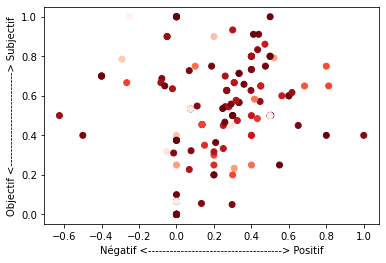

In [51]:
# On représente graphiquement les probas d'être spam pour les spams
probas = proba_spam[y_test == 1]
x = X_test.positivite[y_test == 1] # abscisse : positivité
y = X_test.subjectivite[y_test == 1] # ordonnée : subjectivité
import matplotlib.pyplot as plt
plt.scatter(x, y, c = probas, cmap = "Reds")
plt.xlabel("Négatif <-------------------------------------> Positif")
plt.ylabel("Objectif <--------------------------> Subjectif")
plt.show()

On remarque que les points que l'on repère le mieux sont plutôt concentrés au milieu du graphique, ce qui laisse penser que c'est surtout l'aspect positif ou négatif qui joue. On peut vérifier ça : 

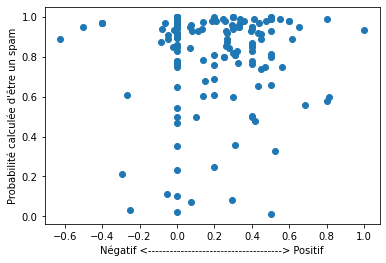

In [56]:
plt.scatter(x, probas)
plt.xlabel("Négatif <-------------------------------------> Positif")
plt.ylabel("Probabilité calculée d'être un spam")
plt.show()